In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# File paths
mix_path = r'F:\coding\workspace\stem sap\musdb18hq\train\A Classic Education - NightOwl\mixture.wav'
original_stem_path = r'F:\coding\workspace\stem sap\musdb18hq\train\A Classic Education - NightOwl\vocals.wav'
separated_stem_path = r'F:\coding\workspace\stem sap\sap_output\A Classic Education - NightOwl\Demucs\htdemucs\mixture\vocals.wav'


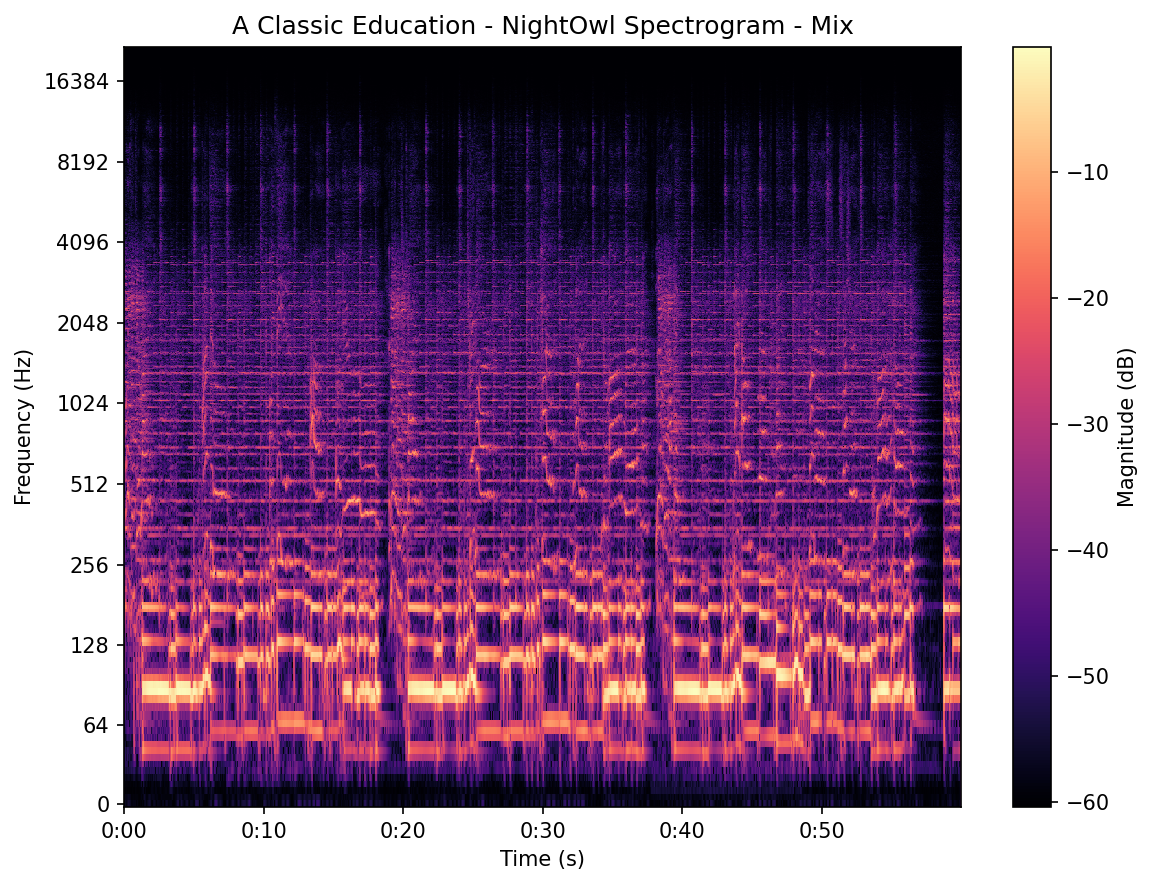

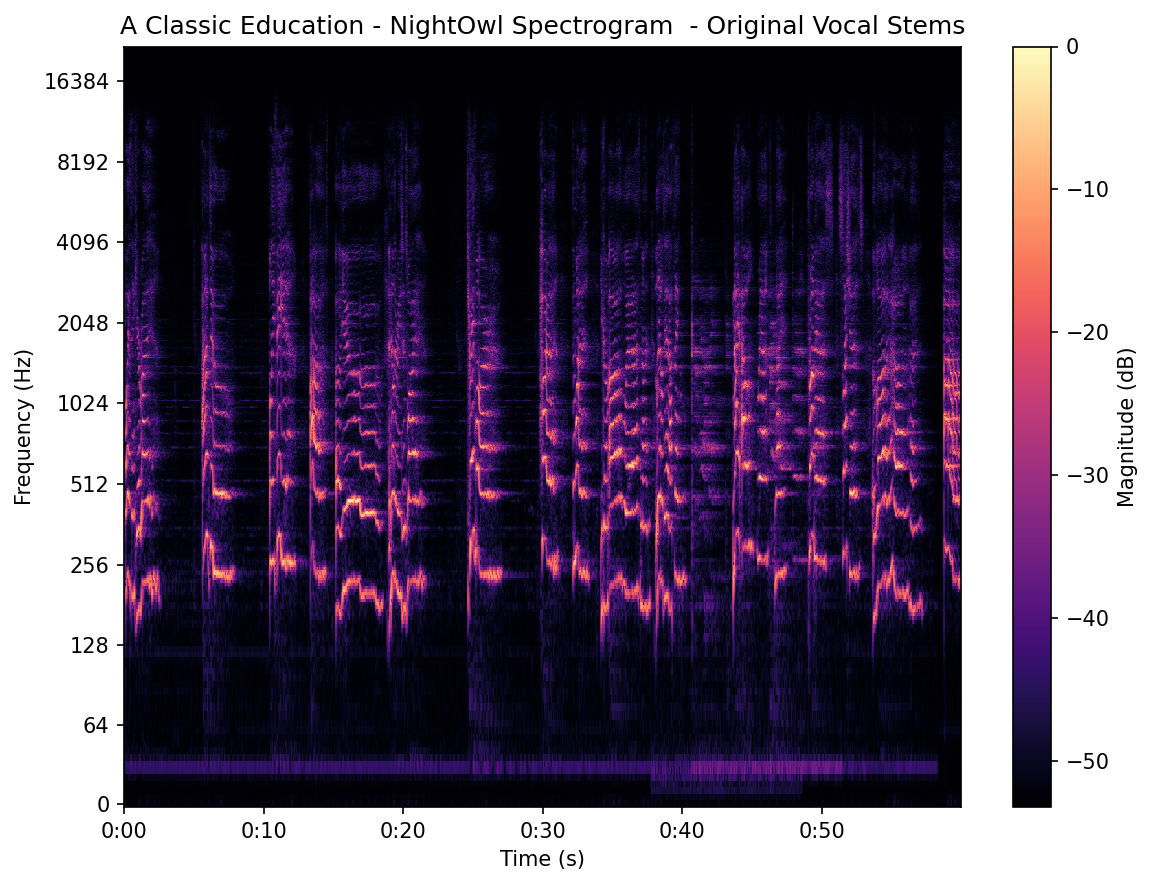

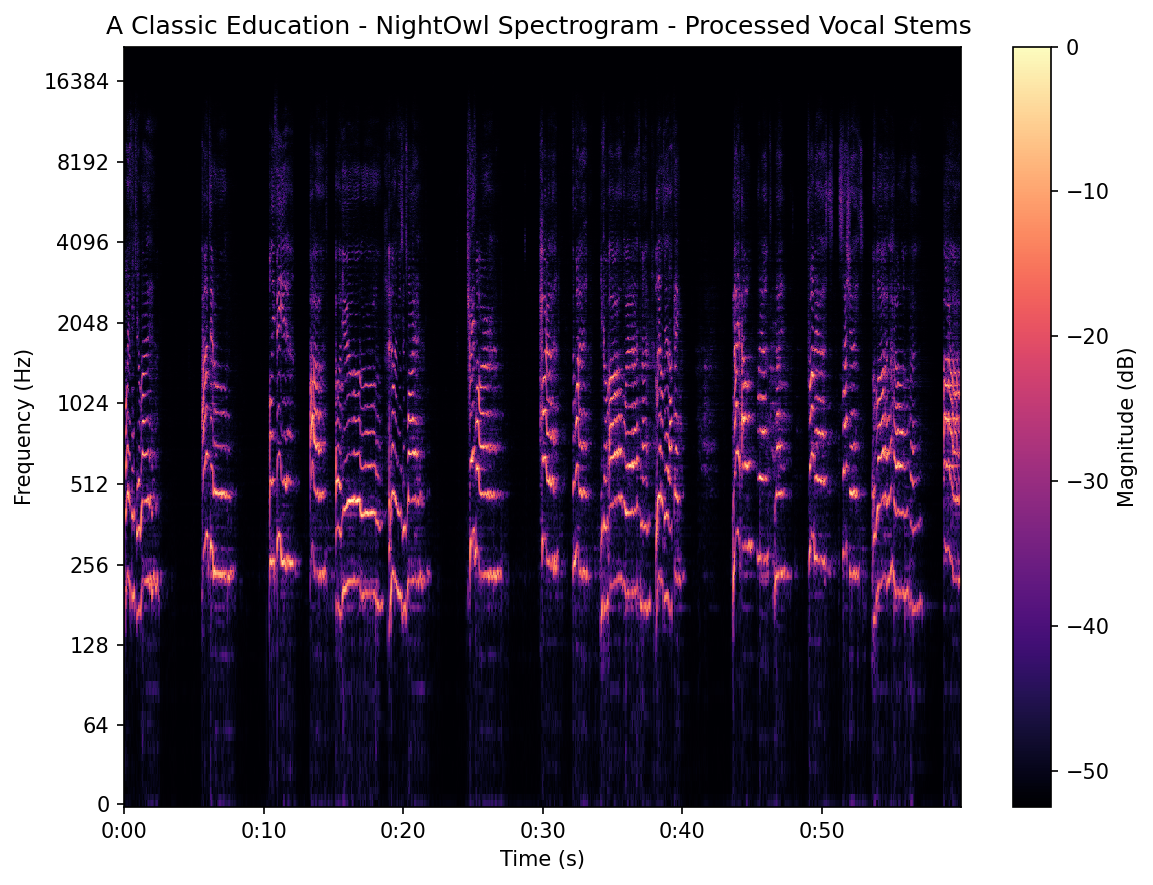

In [13]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def compute_log_spectrogram(audio_path, sr=44100, n_fft=4096, hop_length=512, duration=60, gain_factor=1.0, gain_offset=0.0):
    # Load only the first `duration` seconds of audio
    y, sr = librosa.load(audio_path, sr=sr, duration=duration)
    # Calculate spectrogram with high resolution
    S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    S = S * gain_factor + gain_offset  # Apply gain
    
    # Convert to decibel scale for better visibility
    S_db = librosa.amplitude_to_db(S, ref=np.max)
    times = librosa.frames_to_time(np.arange(S.shape[1]), sr=sr, hop_length=hop_length)
    return S_db, times, sr

def plot_log_spectrogram(S_db, times, sr, title, n_fft):
    plt.figure(figsize=(8, 6), dpi=150)  # Increase DPI for higher resolution
    librosa.display.specshow(S_db, sr=sr, hop_length=n_fft // 4, x_axis='time', y_axis='log', cmap='magma')
    plt.colorbar(label='Magnitude (dB)')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

# File paths
mix_file = mix_path  # Replace with your mix file
original_stems_file = original_stem_path  # Replace with your original stems file
processed_stems_file = separated_stem_path  # Replace with your processed stems file

# High-resolution spectrograms for the first 60 seconds
mix_S_db, mix_times, sr = compute_log_spectrogram(mix_file, n_fft=8192, hop_length=2048, gain_factor=2.0, gain_offset=1.0, duration=60)
original_S_db, original_times, sr = compute_log_spectrogram(original_stems_file, n_fft=8192, hop_length=2048, gain_factor=2.0, gain_offset=1.0, duration=60)
processed_S_db, processed_times, sr = compute_log_spectrogram(processed_stems_file, n_fft=8192, hop_length=2048, gain_factor=2.0, gain_offset=1.0, duration=60)

# Plot spectrograms
plot_log_spectrogram(mix_S_db, mix_times, sr, "A Classic Education - NightOwl Spectrogram - Mix", n_fft=8192)
plot_log_spectrogram(original_S_db, original_times, sr, "A Classic Education - NightOwl Spectrogram  - Original Vocal Stems", n_fft=8192)
plot_log_spectrogram(processed_S_db, processed_times, sr, "A Classic Education - NightOwl Spectrogram - Processed Vocal Stems ", n_fft=8192)


Correlation Matrix:
                           SAR (dB)  Frequency Isolation Score  \
SAR (dB)                   1.000000                  -0.168848   
Frequency Isolation Score -0.168848                   1.000000   
Dynamic Stability Score    0.180946                  -0.111579   

                           Dynamic Stability Score  
SAR (dB)                                  0.180946  
Frequency Isolation Score                -0.111579  
Dynamic Stability Score                   1.000000  


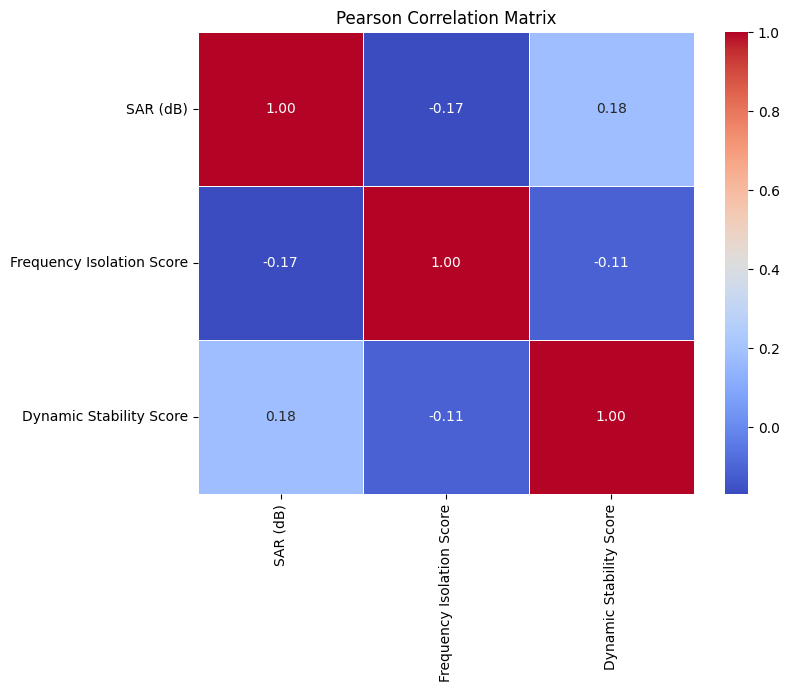

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'file_path' with the actual file path)
file_path = r'F:\coding\workspace\stem sap\evaluation_results.csv'
data = pd.read_csv(file_path)

# Extract relevant columns for correlation analysis
relevant_data = data[['SAR (dB)', 'Frequency Isolation Score', 'Dynamic Stability Score']]

# Calculate the Pearson correlation matrix
correlation_matrix = relevant_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Matrix")
plt.show()


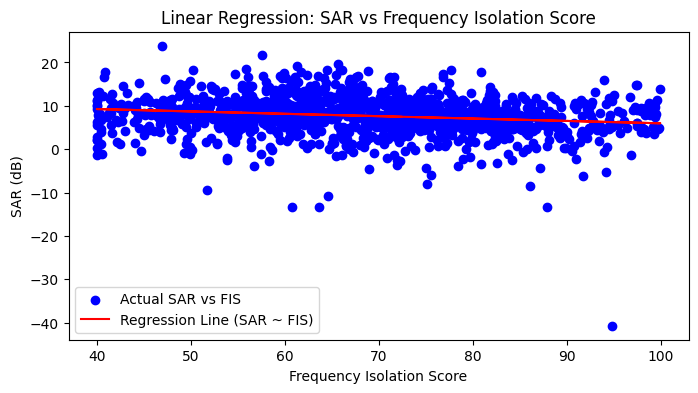

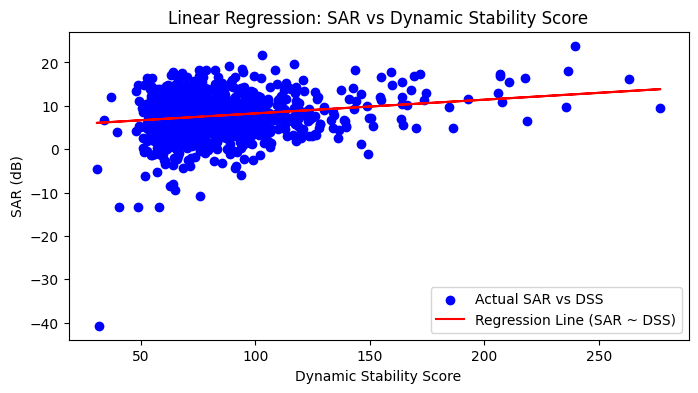

Regression results for SAR vs FIS:
Coefficient: -0.054754076708850914
Intercept: 11.440921149164584
R^2 Score: 0.02850953536732126

Regression results for SAR vs DSS:
Coefficient: 0.03159047371457505
Intercept: 5.089790124247693
R^2 Score: 0.0327414673407016


In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = r'F:\coding\workspace\stem sap\evaluation_results.csv'
data = pd.read_csv(file_path)

# Extract relevant columns for regression analysis
X_FIS = data[['Frequency Isolation Score']].values  # Independent variable (FIS)
X_DSS = data[['Dynamic Stability Score']].values    # Independent variable (DSS)
y = data['SAR (dB)'].values.reshape(-1, 1)          # Dependent variable (SAR)

# Initialize the regression model
reg_fis = LinearRegression()
reg_dss = LinearRegression()

# Fit the models
reg_fis.fit(X_FIS, y)
reg_dss.fit(X_DSS, y)

# Predictions for visualization
y_pred_fis = reg_fis.predict(X_FIS)
y_pred_dss = reg_dss.predict(X_DSS)

# Plot regression results for FIS
plt.figure(figsize=(8, 4))
plt.scatter(X_FIS, y, color='blue', label='Actual SAR vs FIS')
plt.plot(X_FIS, y_pred_fis, color='red', label='Regression Line (SAR ~ FIS)')
plt.xlabel('Frequency Isolation Score')
plt.ylabel('SAR (dB)')
plt.title('Linear Regression: SAR vs Frequency Isolation Score')
plt.legend()
plt.show()

# Plot regression results for DSS
plt.figure(figsize=(8, 4))
plt.scatter(X_DSS, y, color='blue', label='Actual SAR vs DSS')
plt.plot(X_DSS, y_pred_dss, color='red', label='Regression Line (SAR ~ DSS)')
plt.xlabel('Dynamic Stability Score')
plt.ylabel('SAR (dB)')
plt.title('Linear Regression: SAR vs Dynamic Stability Score')
plt.legend()
plt.show()

# Print model coefficients and R^2 scores
print("Regression results for SAR vs FIS:")
print(f"Coefficient: {reg_fis.coef_[0][0]}")
print(f"Intercept: {reg_fis.intercept_[0]}")
print(f"R^2 Score: {reg_fis.score(X_FIS, y)}")

print("\nRegression results for SAR vs DSS:")
print(f"Coefficient: {reg_dss.coef_[0][0]}")
print(f"Intercept: {reg_dss.intercept_[0]}")
print(f"R^2 Score: {reg_dss.score(X_DSS, y)}")


In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
file_path = 'F:\coding\workspace\stem sap\evaluation_results.csv'
data = pd.read_csv(file_path)

# Extract relevant columns for multiple regression
X = data[['Frequency Isolation Score', 'Dynamic Stability Score']]  # Independent variables
y = data['SAR (dB)']  # Dependent variable

# Add a constant to the independent variables for statsmodels (this adds the intercept term)
X_with_const = sm.add_constant(X)

# Fit the regression model using statsmodels
model = sm.OLS(y, X_with_const).fit()

# Extract regression metrics
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj
f_statistic = model.fvalue
f_pvalue = model.f_pvalue  # P-value for the overall F-test

# Extract coefficients and intercept
coefficients = model.params  # Includes intercept as the first term

# Summarize results
summary = {
    "R^2": r_squared,
    "Adjusted R^2": adjusted_r_squared,
    "F-Statistic": f_statistic,
    "F-Statistic P-Value": f_pvalue,
    "Intercept": coefficients['const'],
    "Coefficient (FIS)": coefficients['Frequency Isolation Score'],
    "Coefficient (DSS)": coefficients['Dynamic Stability Score']
}

# Display the metrics
print("Multiple Linear Regression Metrics:")
for key, value in summary.items():
    print(f"{key}: {value:.4f}")

print("\nRegression Model Summary:")
print(model.summary())


Multiple Linear Regression Metrics:
R^2: 0.0551
Adjusted R^2: 0.0535
F-Statistic: 34.9133
F-Statistic P-Value: 0.0000
Intercept: 8.6764
Coefficient (FIS): -0.0488
Coefficient (DSS): 0.0287

Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:               SAR (dB)   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     34.91
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           1.83e-15
Time:                        19:17:11   Log-Likelihood:                -3509.9
No. Observations:                1200   AIC:                             7026.
Df Residuals:                    1197   BIC:                             7041.
Df Model:                           2                                         
Covariance Type:            nonrobust                                    